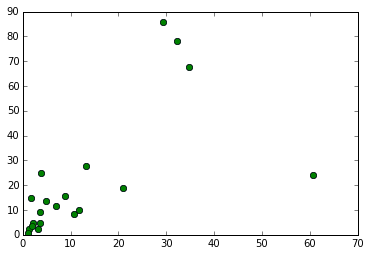

In [9]:
% matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import datetime

ship = pd.read_csv('F:/okada/Dropbox/chlorophyll/chlo.csv', encoding='Shift_JIS')
ship.columns = ['sname','station','time','layer','depth','vol','chlo','pheo','obweb']
plt.plot(ship.obweb, ship.chlo, 'o')

1.4
52.6
1.86666666667
23.5666666667
4.53333333333
0.95
31.0666666667
3.12
20.3
9.56666666667
3.56666666667
8.43333333333
7.9
nan
2.0
7.2
31.55
6.95
3.65
8.9
4.8


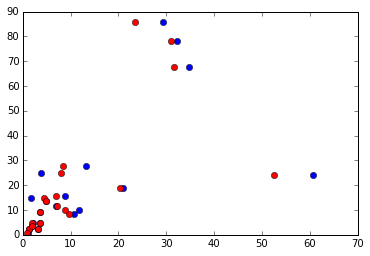

In [45]:
sname = {3:'kanku', 4:'kobe', 5:'yodo', 6:'hannan', 7:'sakai',12:'osaka', 13:'kishiwada'}

obweb1 = []
for i in range(len(ship)):
    sh = ship.loc[i]
    station = sh.station
    dtime = datetime.datetime.strptime(sh.time, '%Y/%m/%d %H:%M')
    time = datetime.datetime.strftime(dtime, '%Y%m')
    fname= 'F:/okada/Dropbox/chlorophyll/{}_{}.csv'.format(sname[station], time)
    ob = pd.read_csv(fname, encoding='Shift_JIS', na_values='*')
    ob.columns = ['sname','time','layer','depth','bottom','temp','salt','light','DO','FTU','chlo']
    
    ob1 = ob[ob.time==sh.time]
    ob1 = ob1[(ob1.layer>=sh.layer-1) & (ob1.layer<=sh.layer+1)]
    obweb1.append(ob1.chlo.mean())
    
    ob2 = ob[ob.layer==sh.layer]
    delta = datetime.timedelta(hours=1)
    #ob2_dtime = [datetime.datetime.strptime(t, '%Y/%m/%d %H:%M') for t in ob2.time.tolist()]
    #ob2 = ob2[(ob2_dtime>=dtime-delta) & (ob2_dtime<=dtime+delta)]
    
    print ob1.chlo.mean()

plt.plot(ship.obweb, ship.chlo, 'bo')
plt.plot(obweb1, ship.chlo, 'ro')